In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet,
    HuberRegressor, PassiveAggressiveRegressor, SGDRegressor,
    BayesianRidge, ARDRegression, TheilSenRegressor, RANSACRegressor
)
from sklearn.svm import SVR
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor,
    AdaBoostRegressor, ExtraTreesRegressor, BaggingRegressor
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor


<div dir="rtl">

## بارگذاری دیتاست Boston Housing

</div>

In [36]:
from sklearn.datasets import fetch_openml
bostonData = fetch_openml(name='boston', version=1, as_frame=True, parser='auto')
X = bostonData.data
y = bostonData.target

X.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


<div dir="rtl">

## تقسیم داده به Train/Test و نرمال‌سازی

</div>

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [ ]:
scaler = StandardScaler()
xTrainScaled = scaler.fit_transform(xTrain)
xTestScaled = scaler.transform(xTest)


<div dir="rtl">

## تعریف مدل‌های رگرسیونی

</div>

In [39]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0, random_state=42),
    'Lasso': Lasso(alpha=0.1, random_state=42, max_iter=10000),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42, max_iter=10000),
    'Bayesian Ridge': BayesianRidge(),
    'ARD Regression': ARDRegression(),
    'Huber Regressor': HuberRegressor(max_iter=1000),
    'RANSAC': RANSACRegressor(random_state=42),
    'Theil-Sen': TheilSenRegressor(random_state=42),
    'SGD Regressor': SGDRegressor(random_state=42, max_iter=10000),
    'Passive Aggressive': PassiveAggressiveRegressor(random_state=42, max_iter=10000),
    'SVR (Linear)': SVR(kernel='linear'),
    'SVR (RBF)': SVR(kernel='rbf', C=1.0, gamma='scale'),
    'SVR (Poly)': SVR(kernel='poly', degree=3, C=1.0),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Extra Trees': ExtraTreesRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'Bagging': BaggingRegressor(n_estimators=100, random_state=42),
}



<div dir="rtl">

## آموزش و ارزیابی مدل‌ها

</div>

In [40]:
results = []


for modelName, model in models.items():
    model.fit(xTrainScaled, yTrain)
    yPredTrain = model.predict(xTrainScaled)
    yPredTest = model.predict(xTestScaled)
    mae = mean_absolute_error(yTest, yPredTest)
    rmse = np.sqrt(mean_squared_error(yTest, yPredTest))
    r2 = r2_score(yTest, yPredTest)
    r2Train = r2_score(yTrain, yPredTrain)
    results.append({
        'Model': modelName,
        'MAE': mae,
        'RMSE': rmse,
        'R2 (Test)': r2,
        'R2 (Train)': r2Train
    })


<div dir="rtl">

جدول زیر نتایج ارزیابی تمام مدل‌ها را نشان می‌دهد. مدل‌ها براساس R² تست مرتب شده‌اند.

</div>

In [41]:
resultsDF = pd.DataFrame(results)
resultsDF = resultsDF.sort_values('R2 (Test)', ascending=False)

resultsDF


,Model,MAE,RMSE,R2 (Test),R2 (Train)
17,Gradient Boosting,1.912183,2.491622,0.915344,0.980030
15,Random Forest,2.041078,2.812960,0.892100,0.977234
19,Bagging,2.050176,2.847233,0.889454,0.977479
16,Extra Trees,1.948392,3.123854,0.866931,1.000000
14,Decision Tree,2.394118,3.227395,0.857963,1.000000
18,AdaBoost,2.466969,3.418397,0.840654,0.908865
7,RANSAC,3.138799,4.584581,0.713387,0.686230
0,Linear Regression,3.189092,4.928602,0.668759,0.750886
1,Ridge,3.185724,4.930812,0.668462,0.750870
4,Bayesian Ridge,3.176569,4.941385,0.667039,0.750459


<div dir="rtl">

مدل Gradient Boosting با R² بالای 0.91 بهترین عملکرد را دارد و RMSE و MAE پایین نشان‌دهنده دقت بالای پیش‌بینی است. از طرف دیگر مدل Passive Aggressive با R² منفی نشان‌دهنده عملکرد بسیار ضعیف است و این مدل حتی از یک مدل ثابت که فقط میانگین را پیش‌بینی می‌کند هم ضعیف‌تر عمل می‌کند.

</div>

<div dir="rtl">

نمودار زیر نشان می‌دهد که چگونه هر مدل داده‌های تست را پیش‌بینی می‌کند. خط سیاه مقادیر واقعی و خطوط رنگی پیش‌بینی‌های مدل‌های مختلف هستند. مدل‌های خوب مثل Gradient Boosting و Random Forest نزدیک به خط سیاه قرار دارند. مدل‌های ضعیف انحراف زیادی از مقادیر واقعی دارند. در قیمت‌های پایین‌تر اکثر مدل‌ها عملکرد بهتری دارند.

</div>

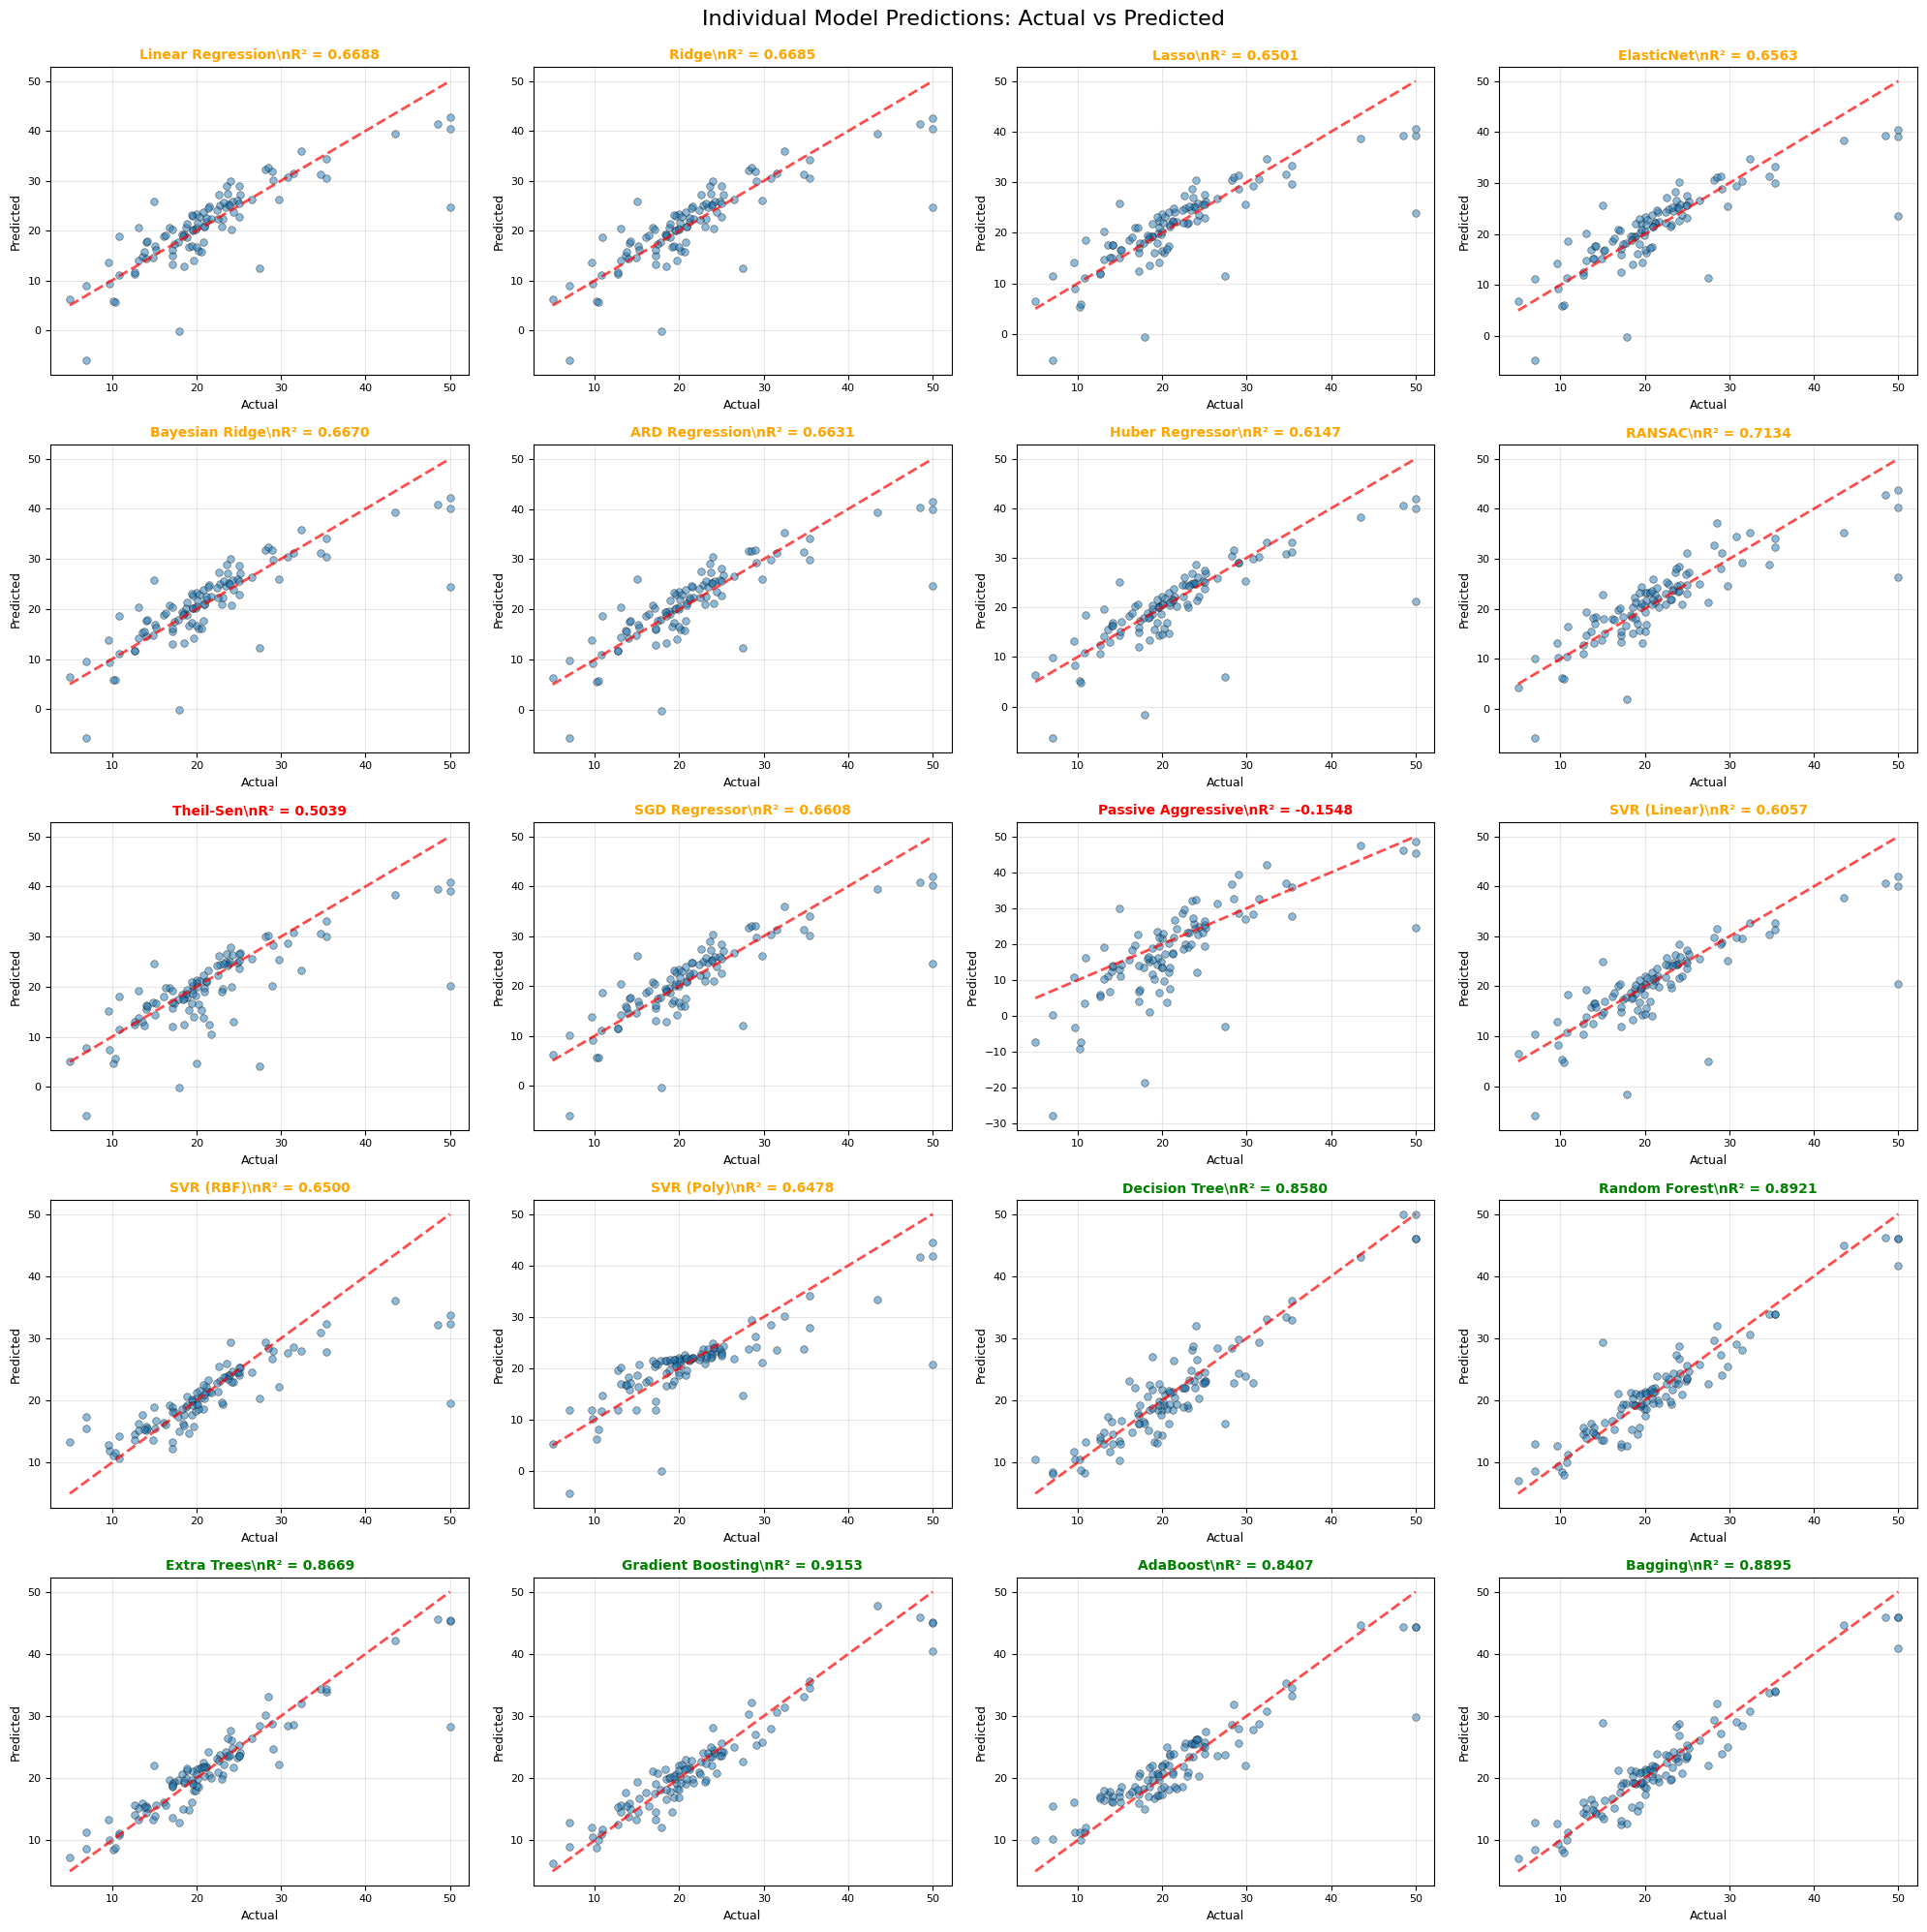

In [ ]:
fig, axes = plt.subplots(5, 4, figsize=(20, 20))
axes = axes.flatten()

for idx, (modelName, model) in enumerate(models.items()):
    yPred = model.predict(xTestScaled)
    
    axes[idx].scatter(yTest, yPred, alpha=0.5, s=30, edgecolor='black', linewidth=0.5)
    axes[idx].plot([yTest.min(), yTest.max()], [yTest.min(), yTest.max()], 
                   'r--', linewidth=2, alpha=0.7)
    
    r2 = r2_score(yTest, yPred)
    
    if r2 > 0.8:
        title_color = 'green'
    elif r2 > 0.6:
        title_color = 'orange'
    else:
        title_color = 'red'
    
    axes[idx].set_title(f'{modelName}\\nR² = {r2:.4f}', fontsize=10, color=title_color, weight='bold')
    axes[idx].set_xlabel('Actual', fontsize=9)
    axes[idx].set_ylabel('Predicted', fontsize=9)
    axes[idx].grid(True, alpha=0.3)
    axes[idx].tick_params(labelsize=8)

plt.suptitle('Individual Model Predictions: Actual vs Predicted', fontsize=16, y=0.995)
plt.tight_layout()
plt.show()

<div dir="rtl">

هر نمودار نشان می‌دهد یک مدل چقدر به خط قرمز که نشان‌دهنده پیش‌بینی کامل است نزدیک می‌شود. مدل‌هایی که عنوان سبز دارند با R² بیشتر از 0.8 عملکرد عالی دارند و پیش‌بینی‌هایشان بسیار نزدیک به واقعیت است. مدل‌های با عنوان نارنجی که R² بیشتر از 0.6 دارند عملکرد قابل قبولی دارند. مدل‌های با عنوان قرمز که R² کمتر از 0.6 دارند ضعیف هستند و نیاز به بهبود دارند.

</div>

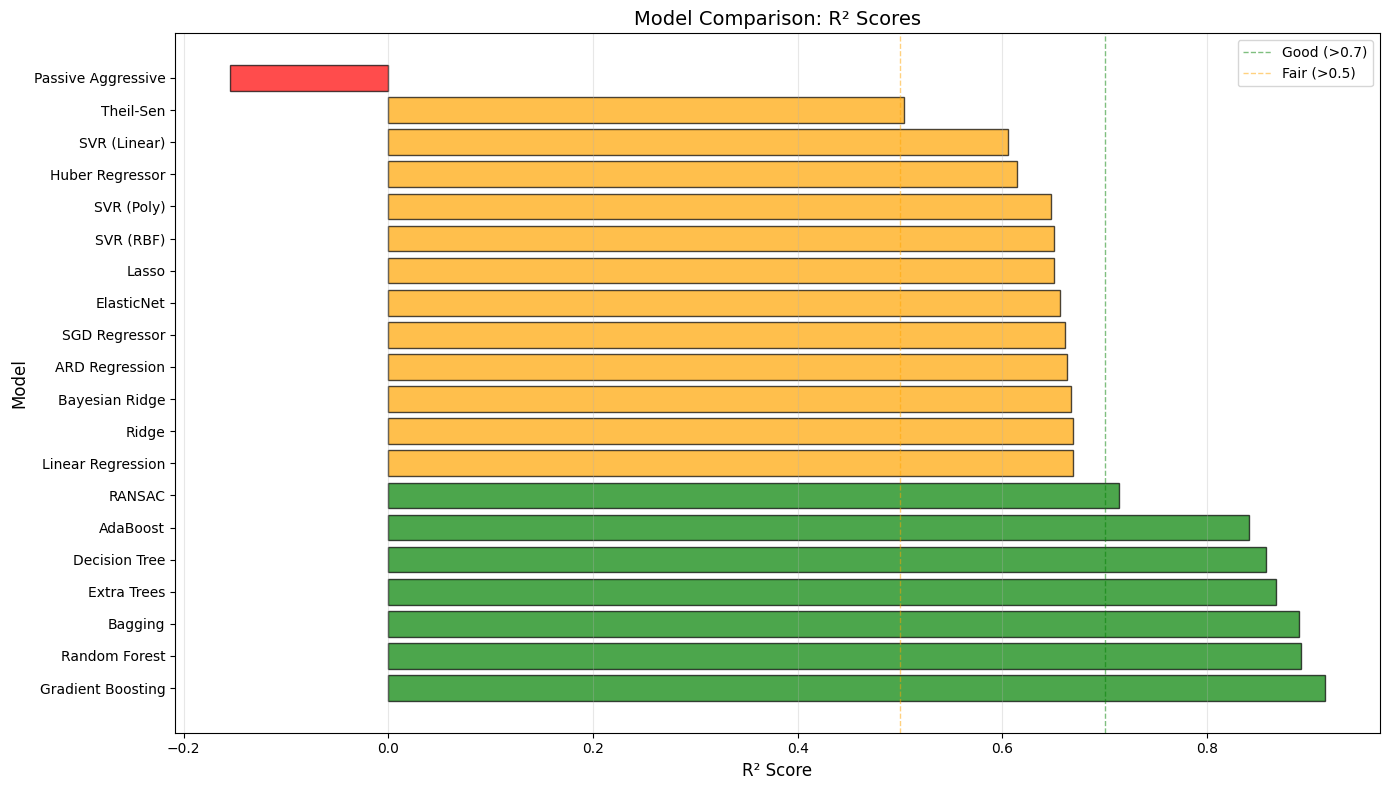

In [43]:
plt.figure(figsize=(14, 8))

modelNames = resultsDF['Model'].values
r2Scores = resultsDF['R2 (Test)'].values

colors = ['green' if r2 > 0.7 else 'orange' if r2 > 0.5 else 'red' for r2 in r2Scores]

plt.barh(modelNames, r2Scores, color=colors, alpha=0.7, edgecolor='black')
plt.xlabel('R² Score', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.title('Model Comparison: R² Scores', fontsize=14)
plt.axvline(x=0.7, color='green', linestyle='--', linewidth=1, alpha=0.5, label='Good (>0.7)')
plt.axvline(x=0.5, color='orange', linestyle='--', linewidth=1, alpha=0.5, label='Fair (>0.5)')
plt.legend()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

<div dir="rtl">

مدل‌های ensemble مثل Gradient Boosting و Random Forest و Bagging در رتبه‌های اول قرار دارند. مدل‌های خطی ساده مثل Linear Regression و Ridge و Lasso عملکرد متوسطی دارند. خط سبز نشان‌دهنده مرز R² بیشتر از 0.7 است که معیار کیفیت خوب محسوب می‌شود و خط نارنجی نشان‌دهنده مرز R² بیشتر از 0.5 است.

</div>

In [44]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

cvResults = []

topModelNames = resultsDF.head(5)['Model'].tolist()

print("Performing 5-Fold Cross Validation for top 5 models...\n")

for modelName in topModelNames:
    model = models[modelName]
    cvScores = cross_val_score(model, xTrainScaled, yTrain, cv=kfold, 
                                scoring='r2', n_jobs=-1)
    
    cvResults.append({
        'Model': modelName,
        'CV Mean R2': cvScores.mean(),
        'CV Std R2': cvScores.std(),
        'CV Min R2': cvScores.min(),
        'CV Max R2': cvScores.max()
    })

cvResultsDF = pd.DataFrame(cvResults)
cvResultsDF

Performing 5-Fold Cross Validation for top 5 models...



,Model,CV Mean R2,CV Std R2,CV Min R2,CV Max R2
0,Gradient Boosting,0.847119,0.050793,0.766700,0.916157
1,Random Forest,0.830425,0.055339,0.752153,0.899951
2,Bagging,0.830669,0.054231,0.761420,0.897145
3,Extra Trees,0.865855,0.046797,0.779649,0.904460
4,Decision Tree,0.621675,0.153921,0.403646,0.831230


<div dir="rtl">

مدل Gradient Boosting کمترین MAE و RMSE را دارد که نشان می‌دهد بهترین دقت را دارد. مدل‌های tree-based به طور کلی خطای کمتری نسبت به سایر مدل‌ها دارند. مدل RANSAC با وجود اینکه R² خوبی دارد اما MAE بالاتری نسبت به سایر مدل‌های برتر دارد که نشان می‌دهد این مدل به outlierها حساس است.

</div>

<div dir="rtl">

مدل‌های Extra Trees و Decision Tree R² در داده‌های Train برابر با 1.0 دارند اما R² در داده‌های Test کمتر است که نشان‌دهنده Overfitting شدید است. مدل Gradient Boosting تفاوت کمی بین Train و Test دارد که نشان‌دهنده تعادل خوب است. مدل‌های خطی ساده R² در Train و Test نزدیک به هم دارند که یعنی Overfitting ندارند اما دقت کلی آن‌ها پایین است. مدل‌هایی که فاصله زیادی بین دو میله دارند Overfitting دارند و باید با احتیاط استفاده شوند.

</div>

In [46]:
print("Best Model:")
bestModel = resultsDF.iloc[0]
print(f"  {bestModel['Model']}: R2 = {bestModel['R2 (Test)']:.4f}, MAE = {bestModel['MAE']:.4f}, RMSE = {bestModel['RMSE']:.4f}")

print("\nWorst Model:")
worstModel = resultsDF.iloc[-1]
print(f"  {worstModel['Model']}: R2 = {worstModel['R2 (Test)']:.4f}, MAE = {worstModel['MAE']:.4f}, RMSE = {worstModel['RMSE']:.4f}")

Best Model:
  Gradient Boosting: R2 = 0.9153, MAE = 1.9122, RMSE = 2.4916

Worst Model:
  Passive Aggressive: R2 = -0.1548, MAE = 6.1681, RMSE = 9.2025


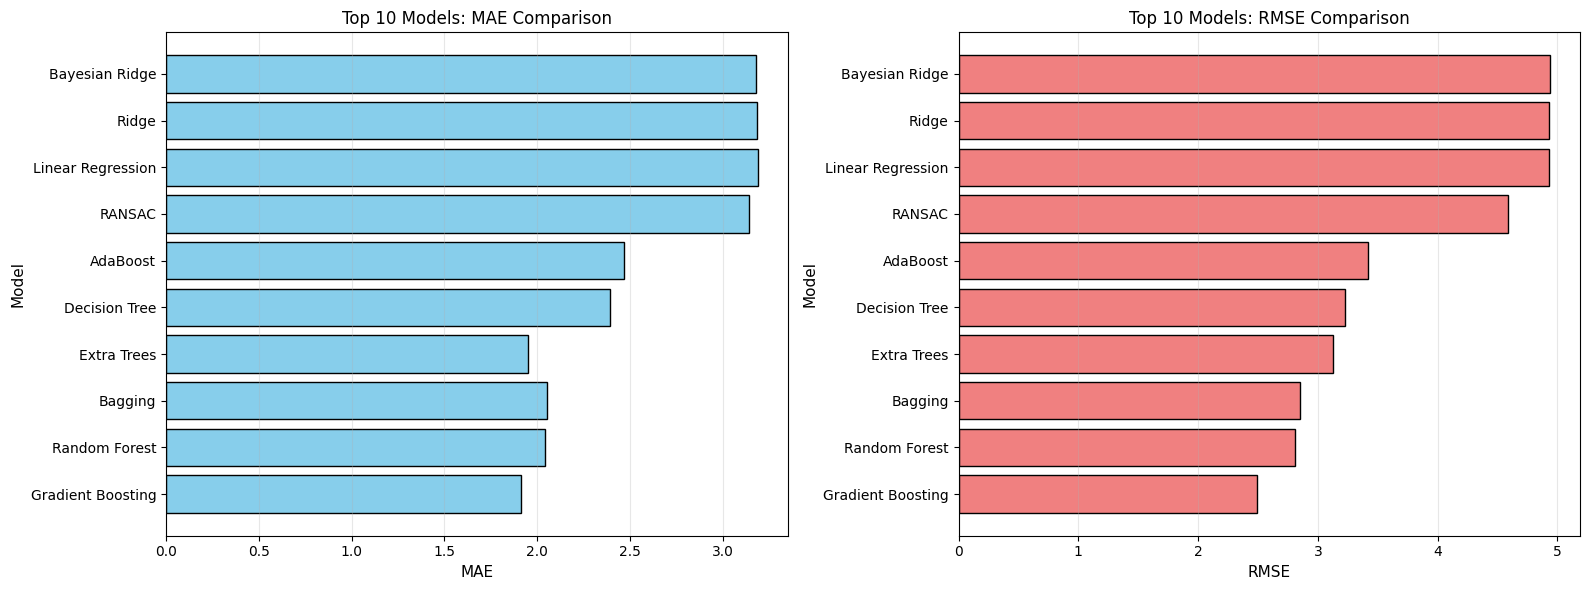

In [48]:
top10 = resultsDF.head(10)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].barh(top10['Model'], top10['MAE'], color='skyblue', edgecolor='black')
axes[0].set_xlabel('MAE', fontsize=11)
axes[0].set_ylabel('Model', fontsize=11)
axes[0].set_title('Top 10 Models: MAE Comparison', fontsize=12)
axes[0].grid(True, alpha=0.3, axis='x')

axes[1].barh(top10['Model'], top10['RMSE'], color='lightcoral', edgecolor='black')
axes[1].set_xlabel('RMSE', fontsize=11)
axes[1].set_ylabel('Model', fontsize=11)
axes[1].set_title('Top 10 Models: RMSE Comparison', fontsize=12)
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

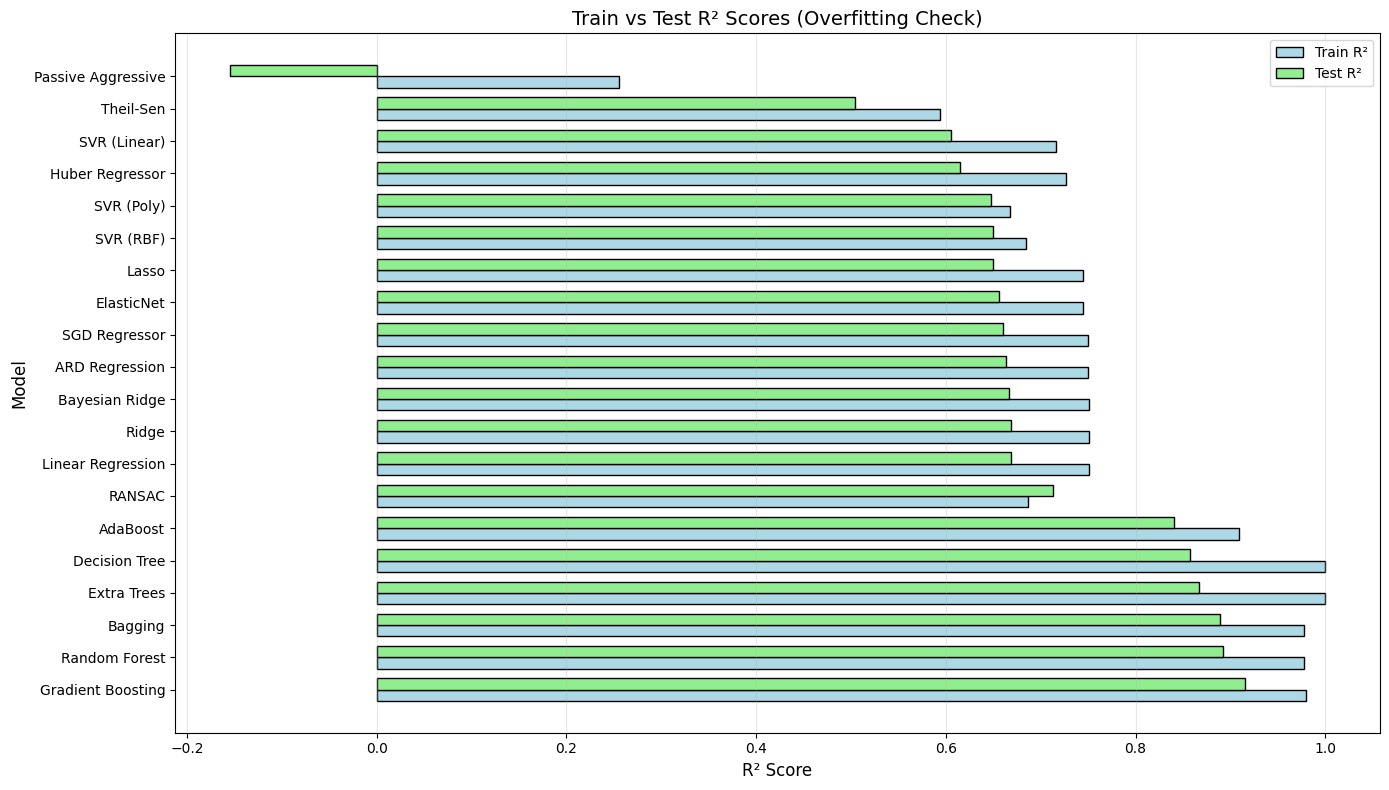

In [49]:
plt.figure(figsize=(14, 8))

x = np.arange(len(resultsDF))
width = 0.35

plt.barh(x - width/2, resultsDF['R2 (Train)'], width, label='Train R²', color='lightblue', edgecolor='black')
plt.barh(x + width/2, resultsDF['R2 (Test)'], width, label='Test R²', color='lightgreen', edgecolor='black')

plt.ylabel('Model', fontsize=12)
plt.xlabel('R² Score', fontsize=12)
plt.title('Train vs Test R² Scores (Overfitting Check)', fontsize=14)
plt.yticks(x, resultsDF['Model'])
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

In [50]:
bestModelName = resultsDF.iloc[0]['Model']
bestModelObj = models[bestModelName]

bestModelObj.fit(xTrainScaled, yTrain)

yPredTest = bestModelObj.predict(xTestScaled)

print(f"Best Model: {bestModelName}")
print(f"MAE: {mean_absolute_error(yTest, yPredTest):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(yTest, yPredTest)):.4f}")
print(f"R²: {r2_score(yTest, yPredTest):.4f}")

Best Model: Gradient Boosting
MAE: 1.9122
RMSE: 2.4916
R²: 0.9153


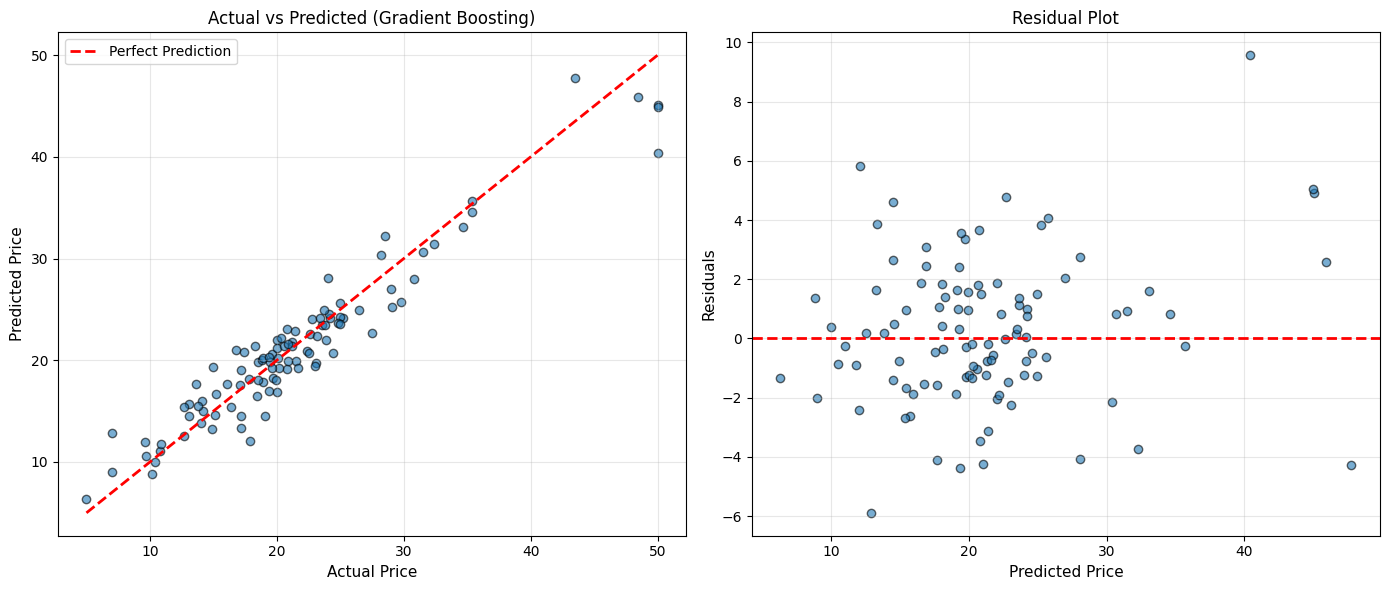

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(yTest, yPredTest, alpha=0.6, edgecolor='black')
axes[0].plot([yTest.min(), yTest.max()], [yTest.min(), yTest.max()], 
             'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Price', fontsize=11)
axes[0].set_ylabel('Predicted Price', fontsize=11)
axes[0].set_title(f'Actual vs Predicted ({bestModelName})', fontsize=12)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

residuals = yTest - yPredTest
axes[1].scatter(yPredTest, residuals, alpha=0.6, edgecolor='black')
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Price', fontsize=11)
axes[1].set_ylabel('Residuals', fontsize=11)
axes[1].set_title('Residual Plot', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<div dir="rtl">

توزیع نرمال خطاها نشان‌دهنده مدل خوب است و اگر هیستوگرام شکل زنگوله‌ای داشته باشد بهتر است. میانگین نزدیک به صفر یعنی مدل بدون bias سیستماتیک کار می‌کند و به یک طرف تمایل ندارد. اگر توزیع به یک سمت کج باشد یعنی مدل در یک سمت بهتر کار می‌کند و در سمت دیگر ضعیف‌تر است. outlierها که مقادیر دور از صفر هستند نشان‌دهنده پیش‌بینی‌های ضعیف هستند و باید بررسی شوند.

</div>

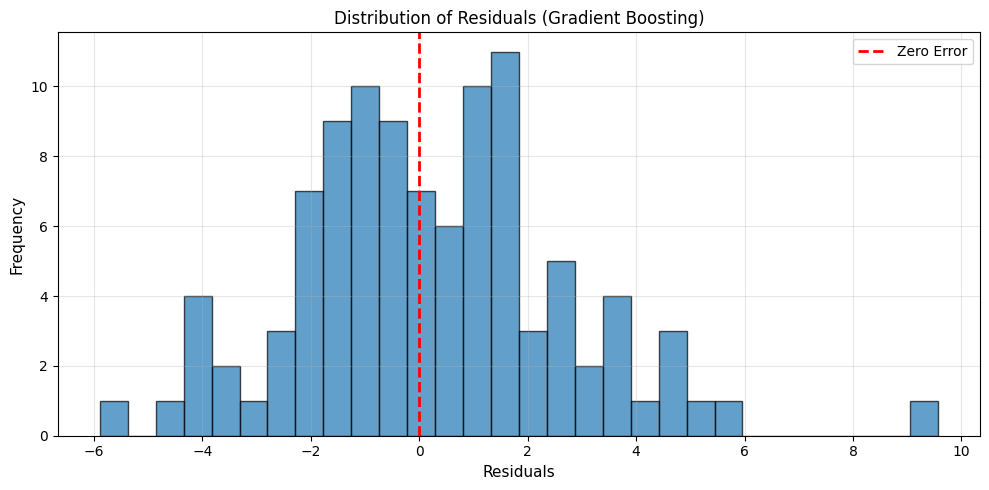

Residuals Statistics:
Mean: 0.2233, Std: 2.4939, Min: -5.8923, Max: 9.5696


In [52]:
plt.figure(figsize=(10, 5))

plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Residuals', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.title(f'Distribution of Residuals ({bestModelName})', fontsize=12)
plt.axvline(x=0, color='r', linestyle='--', linewidth=2, label='Zero Error')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Residuals Statistics:")
print(f"Mean: {residuals.mean():.4f}, Std: {residuals.std():.4f}, Min: {residuals.min():.4f}, Max: {residuals.max():.4f}")